#Installing the Required Libraries

In [ ]:
!pip install torch torchvision pytorch-spiking matplotlib numpy

#Downloading & Preprocessing FMNIST Dataset

Here we download the dataset, load it. we define the spiking model, the optimizer, and the learning rate scheduler. We'll also ensure that the model is defined before creating the optimizer and scheduler.

100%|██████████| 26421880/26421880 [00:02<00:00, 10744480.43it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 174429.99it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1912540.13it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23068672.00it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



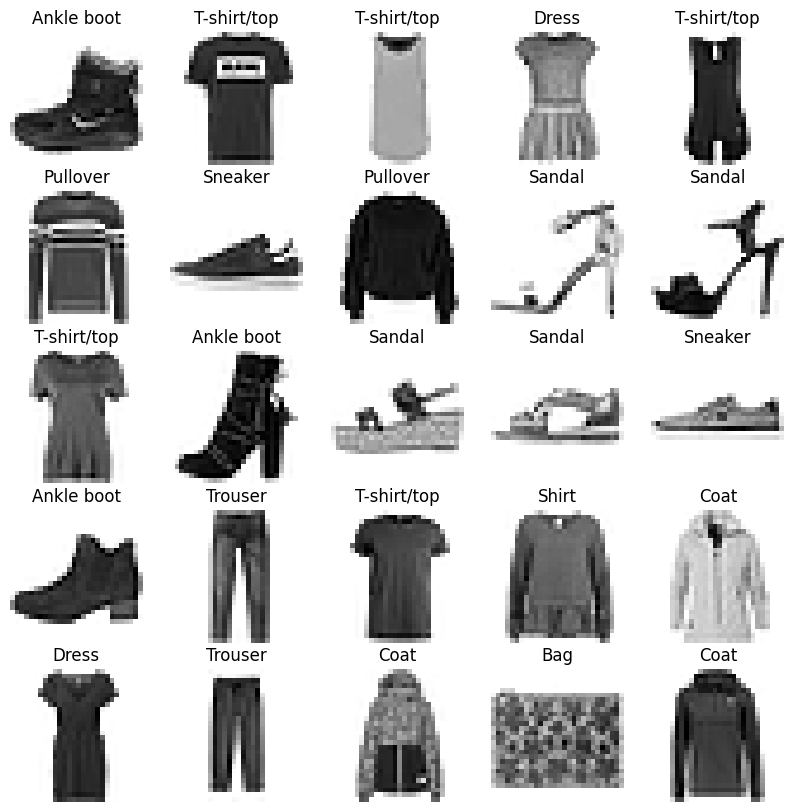

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Load dataset and convert to numpy arrays
train_images, train_labels = zip(
    *torchvision.datasets.FashionMNIST(".", train=True, download=True)
)
train_images = np.asarray([np.array(img) for img in train_images], dtype=np.float32)
train_labels = np.asarray(train_labels, dtype=np.int64)
test_images, test_labels = zip(
    *torchvision.datasets.FashionMNIST(".", train=False, download=True)
)
test_images = np.asarray([np.array(img) for img in test_images], dtype=np.float32)
test_labels = np.asarray(test_labels, dtype=np.int64)

# Normalize images so values are between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert to PyTorch tensors
train_images = torch.tensor(train_images).unsqueeze(1)  # Adding channel dimension
train_labels = torch.tensor(train_labels)
test_images = torch.tensor(test_images).unsqueeze(1)  # Adding channel dimension
test_labels = torch.tensor(test_labels)

# Create DataLoaders
train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Plot some sample images
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
    plt.axis("off")
    plt.title(class_names[train_labels[i]])
plt.show()

In [ ]:
print(train_images)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
print(test_images)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
print(train_dataset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
print(test_dataset)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
!pip install torch torchvision pytorch-spiking

#Training the SNN Model

In [ ]:
!pip install torch torchvision pytorch-spiking matplotlib numpy norse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for norse: filename=norse-1.1.0-py3-none-any.whl size=1539017 sha256=6172edee222afb9c3cbb2a3f3e36061c3f08368c577ac888a00d2698a49b49e7
  Stored in directory: /root/.cache/pip/wheels/16/fc/0d/4cbb14992b7e5bb35482df57e887a2ab55cad9ea890501cf61
Successfully built norse


#Splpitting the data into validation data

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the full training set
full_trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Split the full training set into training and validation sets
train_size = 50000
val_size = 10000
train_subset, val_subset = random_split(full_trainset, [train_size, val_size])

# Create DataLoaders for training and validation sets
trainloader = DataLoader(train_subset, batch_size=64, shuffle=True)
valloader = DataLoader(val_subset, batch_size=64, shuffle=False)

# Download and load the test set
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Print the sizes of the datasets
print(f"Training set size: {len(train_subset)}")
print(f"Validation set size: {len(val_subset)}")
print(f"Test set size: {len(testset)}")

Training set size: 50000
Validation set size: 10000
Test set size: 10000


#Training the Bsseline SNN model on training data (50,000) images

/usr/local/lib/python3.10/dist-packages/torch/utils/_cxx_pytree.py:241: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(
/usr/local/lib/python3.10/dist-packages/torch/utils/_cxx_pytree.py:241: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFBoxParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(


Epoch [1], Training Loss: 1.698, Validation Loss: 1.630
Epoch [2], Training Loss: 1.613, Validation Loss: 1.606
Epoch [3], Training Loss: 1.599, Validation Loss: 1.596
Epoch [4], Training Loss: 1.583, Validation Loss: 1.579
Epoch [5], Training Loss: 1.574, Validation Loss: 1.575
Epoch [6], Training Loss: 1.569, Validation Loss: 1.574
Epoch [7], Training Loss: 1.565, Validation Loss: 1.569
Epoch [8], Training Loss: 1.561, Validation Loss: 1.567
Epoch [9], Training Loss: 1.557, Validation Loss: 1.560
Epoch [10], Training Loss: 1.547, Validation Loss: 1.551
Epoch [11], Training Loss: 1.542, Validation Loss: 1.547
Epoch [12], Training Loss: 1.538, Validation Loss: 1.544
Epoch [13], Training Loss: 1.534, Validation Loss: 1.542
Epoch [14], Training Loss: 1.533, Validation Loss: 1.540
Epoch [15], Training Loss: 1.529, Validation Loss: 1.538
Epoch [16], Training Loss: 1.526, Validation Loss: 1.534
Epoch [17], Training Loss: 1.524, Validation Loss: 1.533
Epoch [18], Training Loss: 1.522, Valida

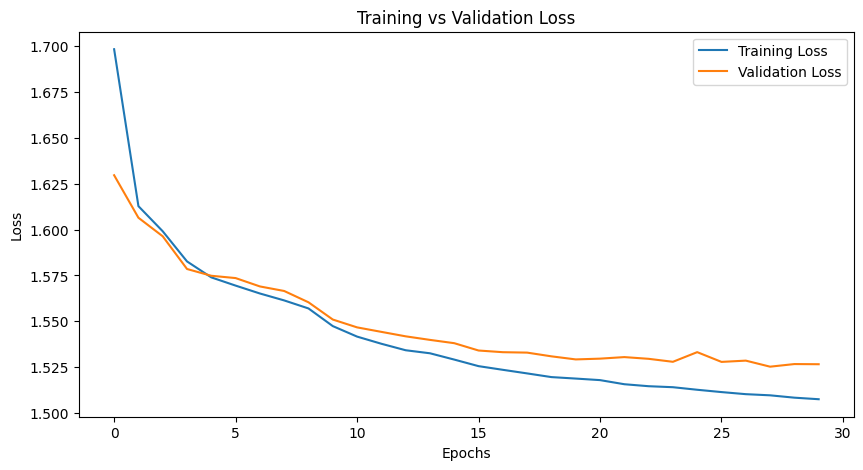

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import norse.torch as norse
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the dataset
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_data, val_data = train_test_split(dataset, test_size=0.1667, random_state=42)  # 50,000 train and 10,000 validation

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the SNN architecture with convolutional layers
class SNNModel(nn.Module):
    def __init__(self):
        super(SNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.lif1 = norse.LIFCell()
        self.fc2 = nn.Linear(512, 10)
        self.lif2 = norse.LIFCell()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        z1 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z1 = self.lif1(x, z1)
        x = self.fc2(x)
        z2 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z2 = self.lif2(x, z2)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SNNModel().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training function
def train(net, trainloader, valloader, epochs=30):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_losses.append(running_loss / len(trainloader))

        # Validation loss
        net.eval()
        val_loss = 0.0
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_losses.append(val_loss / len(valloader))

        print(f'Epoch [{epoch + 1}], Training Loss: {running_loss / len(trainloader):.3f}, Validation Loss: {val_loss / len(valloader):.3f}')

    return train_losses, val_losses

# Evaluation function
def evaluate(net, testloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')
    return accuracy

# Train and evaluate the model
train_losses, val_losses = train(net, trainloader, valloader, epochs=30)
accuracy = evaluate(net, testloader)

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

#Making the Predictions on Baseline SNN

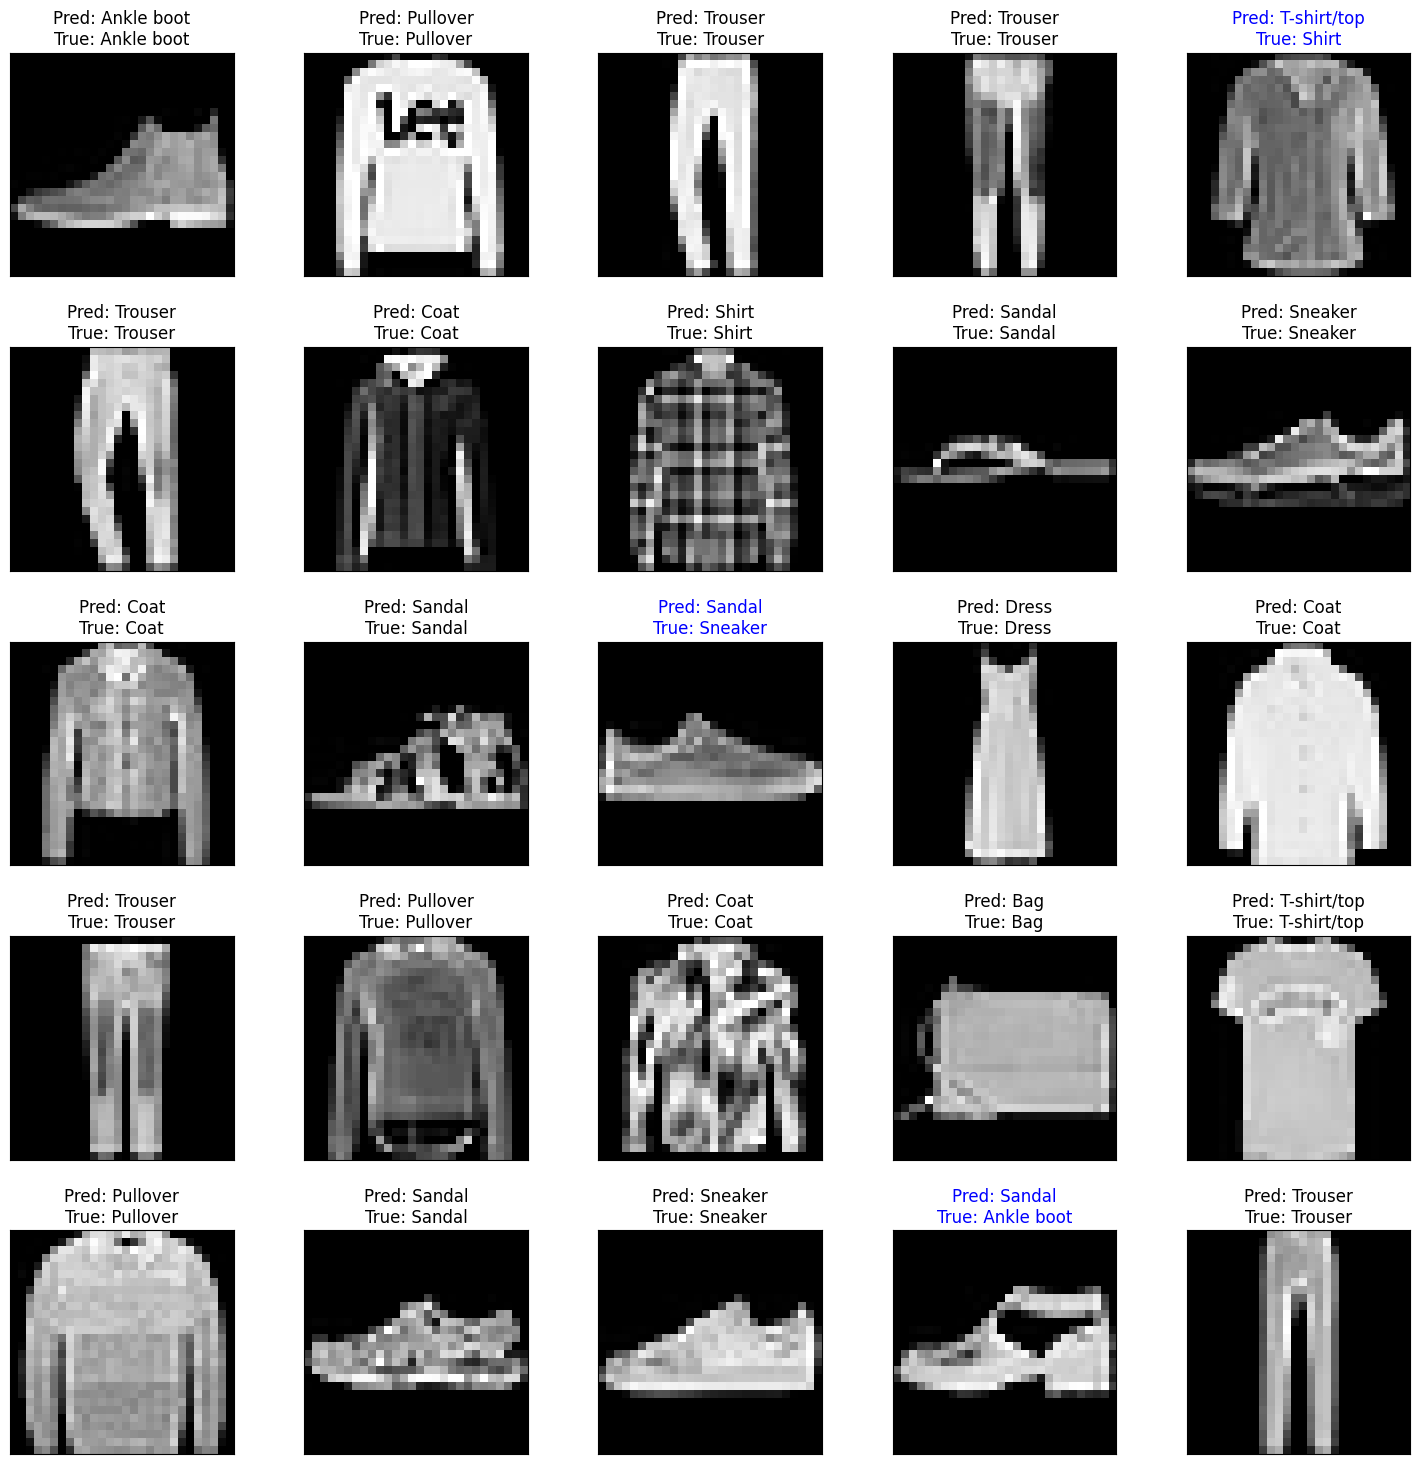

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Function to predict classes for a given dataset
def predict(net, dataloader, classes):
    net.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.numpy())
    return np.array(all_preds), np.array(all_labels)

# Function to visualize the predictions
def visualize_predictions(net, dataloader, classes, num_images=10):
    net.eval()
    images_shown = 0
    fig = plt.figure(figsize=(15, 15))
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)

            for i in range(len(images)):
                if images_shown >= num_images:
                    break
                ax = fig.add_subplot(5, 5, images_shown + 1, xticks=[], yticks=[])
                ax.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
                ax.set_title(f"Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}", color=("black" if predicted[i]==labels[i] else "blue"))
                images_shown += 1
            if images_shown >= num_images:
                break
    plt.tight_layout(pad=2.0)
    plt.show()

# Define the classes in FashionMNIST
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Predict and visualize predictions for test data
predictions, true_labels = predict(net, testloader, classes)
visualize_predictions(net, testloader, classes, num_images=25)

/usr/local/lib/python3.10/dist-packages/torch/utils/_cxx_pytree.py:241: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(
/usr/local/lib/python3.10/dist-packages/torch/utils/_cxx_pytree.py:241: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFBoxParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(


Epoch [1], Training Loss: 1.656
Epoch [2], Training Loss: 1.577
Epoch [3], Training Loss: 1.562
Epoch [4], Training Loss: 1.553
Epoch [5], Training Loss: 1.543
Epoch [6], Training Loss: 1.537
Epoch [7], Training Loss: 1.533
Epoch [8], Training Loss: 1.531
Epoch [9], Training Loss: 1.529
Epoch [10], Training Loss: 1.527
Epoch [11], Training Loss: 1.526
Epoch [12], Training Loss: 1.524
Epoch [13], Training Loss: 1.525
Epoch [14], Training Loss: 1.523
Epoch [15], Training Loss: 1.521
Epoch [16], Training Loss: 1.521
Epoch [17], Training Loss: 1.520
Epoch [18], Training Loss: 1.520
Epoch [19], Training Loss: 1.519
Epoch [20], Training Loss: 1.518
Epoch [21], Training Loss: 1.518
Epoch [22], Training Loss: 1.517
Epoch [23], Training Loss: 1.516
Epoch [24], Training Loss: 1.516
Epoch [25], Training Loss: 1.516
Epoch [26], Training Loss: 1.515
Epoch [27], Training Loss: 1.515
Epoch [28], Training Loss: 1.514
Epoch [29], Training Loss: 1.515
Epoch [30], Training Loss: 1.513
Accuracy of the net

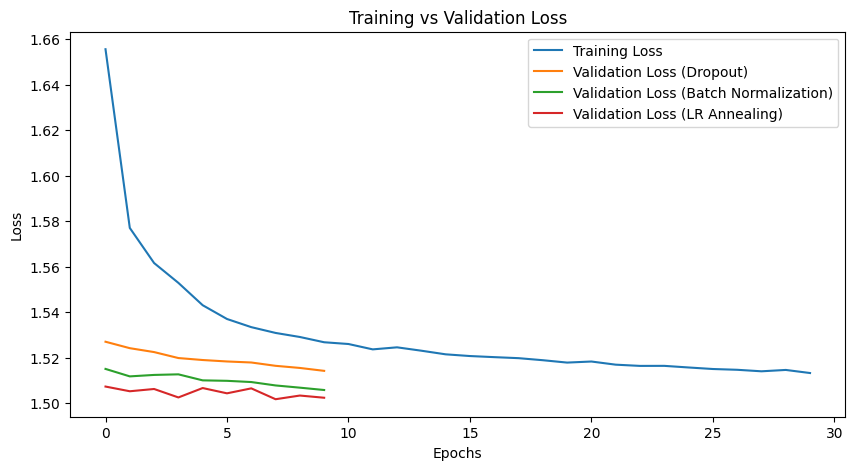

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import norse.torch as norse
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the dataset
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_data, val_data = train_test_split(dataset, test_size=0.1667, random_state=42)  # 50,000 train and 10,000 validation

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the SNN architecture with convolutional layers
class SNNModel(nn.Module):
    def __init__(self):
        super(SNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.lif1 = norse.LIFCell()
        self.fc2 = nn.Linear(512, 10)
        self.lif2 = norse.LIFCell()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(torch.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(torch.relu(self.batchnorm2(self.conv2(x))))
        x = self.dropout(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        z1 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z1 = self.lif1(x, z1)
        x = self.fc2(x)
        z2 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z2 = self.lif2(x, z2)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SNNModel().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)

# Training function
def train(net, trainloader, epochs=30):
    train_losses = []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_losses.append(running_loss / len(trainloader))
        print(f'Epoch [{epoch + 1}], Training Loss: {running_loss / len(trainloader):.3f}')

    return train_losses

# Evaluation function
def evaluate(net, dataloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network: {accuracy:.2f}%')
    return accuracy

# Fine-tuning function
def fine_tune(net, valloader, optimizer, criterion, scheduler, epochs=10):
    val_losses = []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(valloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        val_losses.append(running_loss / len(valloader))
        scheduler.step()
        print(f'Epoch [{epoch + 1}], Validation Loss: {running_loss / len(valloader):.3f}')

    return val_losses

# Train the baseline model
train_losses = train(net, trainloader, epochs=30)

# Evaluate the baseline model
baseline_accuracy = evaluate(net, testloader)

# Fine-tune using the validation dataset with dropout regularization
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
val_losses_dropout = fine_tune(net, valloader, optimizer, criterion, scheduler, epochs=10)
accuracy_dropout = evaluate(net, testloader)

# Fine-tune using the validation dataset with batch normalization
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
val_losses_batchnorm = fine_tune(net, valloader, optimizer, criterion, scheduler, epochs=10)
accuracy_batchnorm = evaluate(net, testloader)

# Fine-tune using the validation dataset with learning rate annealing
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
val_losses_lr_annealing = fine_tune(net, valloader, optimizer, criterion, scheduler, epochs=10)
accuracy_lr_annealing = evaluate(net, testloader)

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses_dropout, label='Validation Loss (Dropout)')
plt.plot(val_losses_batchnorm, label='Validation Loss (Batch Normalization)')
plt.plot(val_losses_lr_annealing, label='Validation Loss (LR Annealing)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

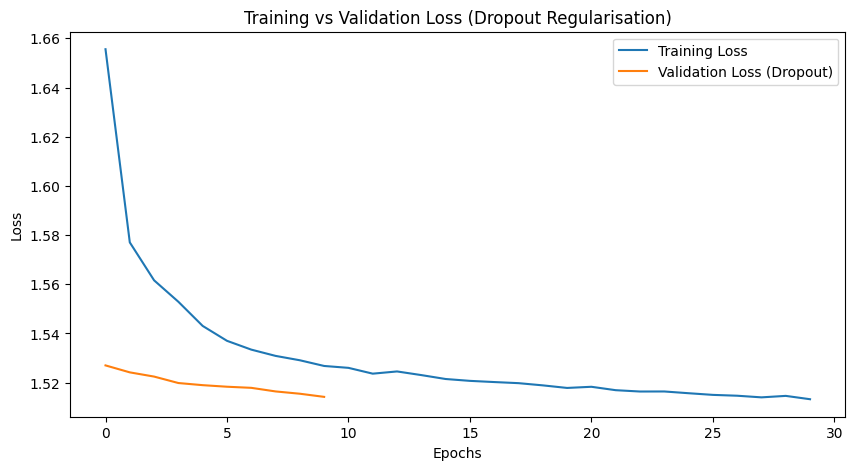

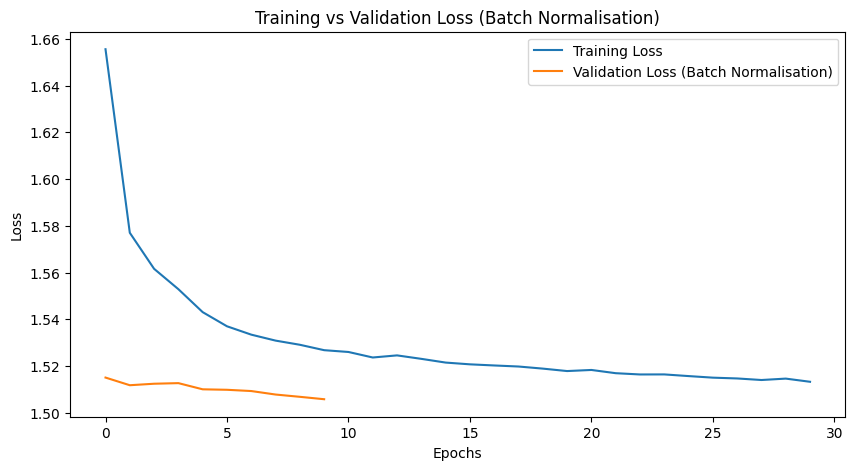

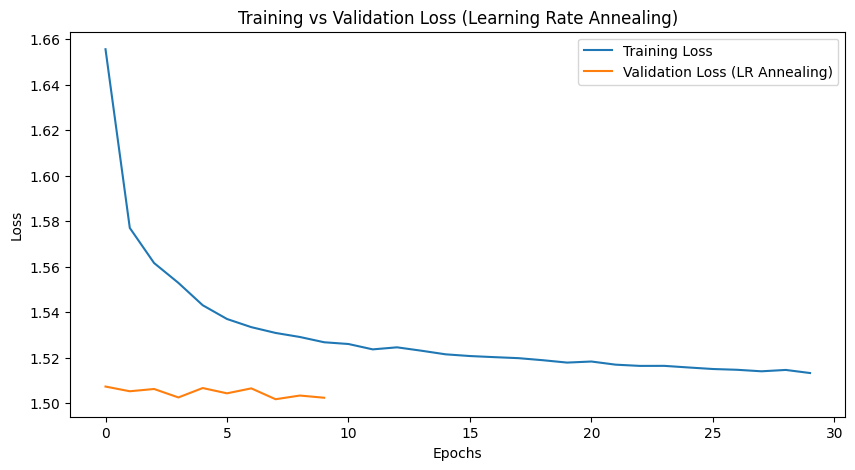

In [ ]:
# Plot training vs validation loss for Dropout regularization
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses_dropout, label='Validation Loss (Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss (Dropout Regularisation)')
plt.show()

# Plot training vs validation loss for Batch normalization
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses_batchnorm, label='Validation Loss (Batch Normalisation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss (Batch Normalisation)')
plt.show()

# Plot training vs validation loss for Learning Rate Annealing
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses_lr_annealing, label='Validation Loss (LR Annealing)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss (Learning Rate Annealing)')
plt.show()


#Predictions for Dropout Regularisation, Batch Normalisation, Learning Rate Annealing

Epoch [1], Validation Loss: 1.840
Epoch [2], Validation Loss: 1.617
Epoch [3], Validation Loss: 1.598
Epoch [4], Validation Loss: 1.589
Epoch [5], Validation Loss: 1.582
Epoch [6], Validation Loss: 1.578
Epoch [7], Validation Loss: 1.571
Epoch [8], Validation Loss: 1.567
Epoch [9], Validation Loss: 1.563
Epoch [10], Validation Loss: 1.561


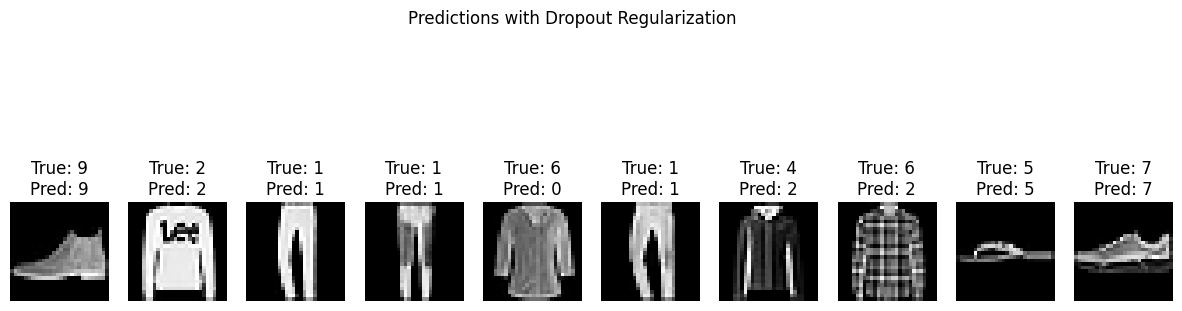

Epoch [1], Validation Loss: 1.836
Epoch [2], Validation Loss: 1.620
Epoch [3], Validation Loss: 1.598
Epoch [4], Validation Loss: 1.586
Epoch [5], Validation Loss: 1.582
Epoch [6], Validation Loss: 1.576
Epoch [7], Validation Loss: 1.568
Epoch [8], Validation Loss: 1.565
Epoch [9], Validation Loss: 1.562
Epoch [10], Validation Loss: 1.559


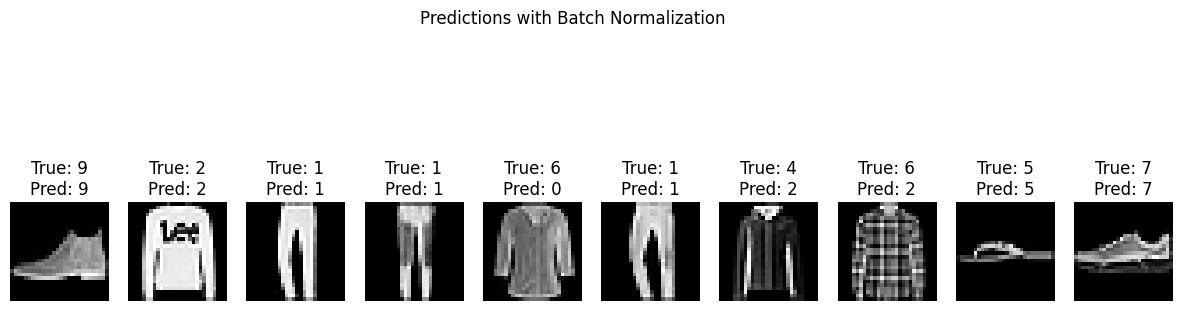

Epoch [1], Validation Loss: 1.835
Epoch [2], Validation Loss: 1.615
Epoch [3], Validation Loss: 1.596
Epoch [4], Validation Loss: 1.590
Epoch [5], Validation Loss: 1.583
Epoch [6], Validation Loss: 1.577
Epoch [7], Validation Loss: 1.573
Epoch [8], Validation Loss: 1.570
Epoch [9], Validation Loss: 1.567
Epoch [10], Validation Loss: 1.561


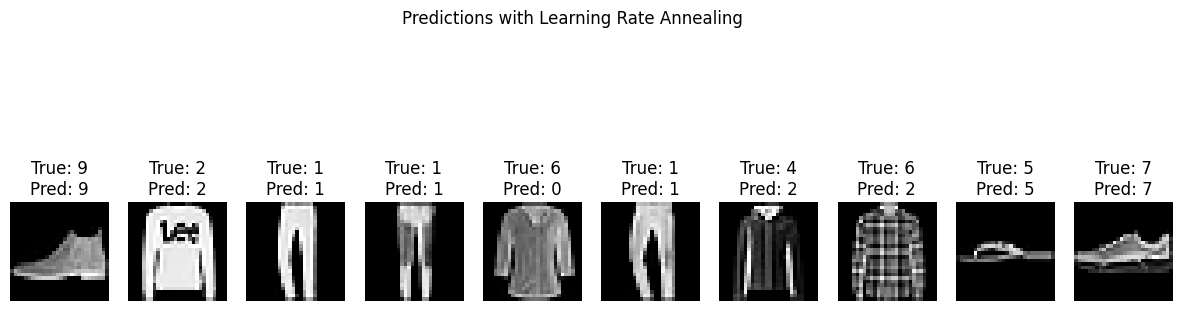

In [ ]:
import numpy as np

# Function to visualize predictions
def visualize_predictions(net, dataloader, title):
    net.eval()
    dataiter = iter(dataloader)
    images, labels = next(dataiter)  # Use next(dataiter) instead of dataiter.next()
    images, labels = images.to(device), labels.to(device)

    # Get predictions
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    # Convert images for display
    images = images.cpu().numpy()
    labels = labels.cpu().numpy()
    predicted = predicted.cpu().numpy()

    # Plot the images with their predictions
    fig, axes = plt.subplots(1, 10, figsize=(15, 5))
    fig.suptitle(title)
    for i in range(10):
        axes[i].imshow(np.squeeze(images[i]), cmap='gray')
        axes[i].set_title(f"True: {labels[i]}\nPred: {predicted[i]}")
        axes[i].axis('off')
    plt.show()

# Reload the model for Dropout regularization, fine-tune if necessary
net_dropout = SNNModel().to(device)
optimizer = optim.Adam(net_dropout.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
fine_tune(net_dropout, valloader, optimizer, criterion, scheduler, epochs=10)
visualize_predictions(net_dropout, testloader, title="Predictions with Dropout Regularization")

# Reload the model for Batch normalization, fine-tune if necessary
net_batchnorm = SNNModel().to(device)
optimizer = optim.Adam(net_batchnorm.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
fine_tune(net_batchnorm, valloader, optimizer, criterion, scheduler, epochs=10)
visualize_predictions(net_batchnorm, testloader, title="Predictions with Batch Normalization")

# Reload the model for Learning Rate Annealing, fine-tune if necessary
net_lr_annealing = SNNModel().to(device)
optimizer = optim.Adam(net_lr_annealing.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
fine_tune(net_lr_annealing, valloader, optimizer, criterion, scheduler, epochs=10)
visualize_predictions(net_lr_annealing, testloader, title="Predictions with Learning Rate Annealing")

#Learning Rate Annealing (Cosine Annealing)

/usr/local/lib/python3.10/dist-packages/torch/utils/_cxx_pytree.py:241: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(
/usr/local/lib/python3.10/dist-packages/torch/utils/_cxx_pytree.py:241: UserWarning: PyTree type <class 'norse.torch.utils.pytree.LIFBoxParameters'> is a subclass of `collections.namedtuple`, which is already registered in the global namespace. Override it with custom flatten/unflatten functions in namespace 'torch'.
  optree.register_pytree_node(


Epoch [1], Training Loss: 1.650
Epoch [2], Training Loss: 1.580
Epoch [3], Training Loss: 1.566
Epoch [4], Training Loss: 1.557
Epoch [5], Training Loss: 1.550
Epoch [6], Training Loss: 1.542
Epoch [7], Training Loss: 1.536
Epoch [8], Training Loss: 1.533
Epoch [9], Training Loss: 1.529
Epoch [10], Training Loss: 1.528
Epoch [11], Training Loss: 1.528
Epoch [12], Training Loss: 1.525
Epoch [13], Training Loss: 1.523
Epoch [14], Training Loss: 1.523
Epoch [15], Training Loss: 1.522
Epoch [16], Training Loss: 1.521
Epoch [17], Training Loss: 1.520
Epoch [18], Training Loss: 1.520
Epoch [19], Training Loss: 1.518
Epoch [20], Training Loss: 1.518
Epoch [21], Training Loss: 1.518
Epoch [22], Training Loss: 1.517
Epoch [23], Training Loss: 1.517
Epoch [24], Training Loss: 1.516
Epoch [25], Training Loss: 1.516
Epoch [26], Training Loss: 1.514
Epoch [27], Training Loss: 1.515
Epoch [28], Training Loss: 1.513
Epoch [29], Training Loss: 1.513
Epoch [30], Training Loss: 1.512
Epoch [1], Validati

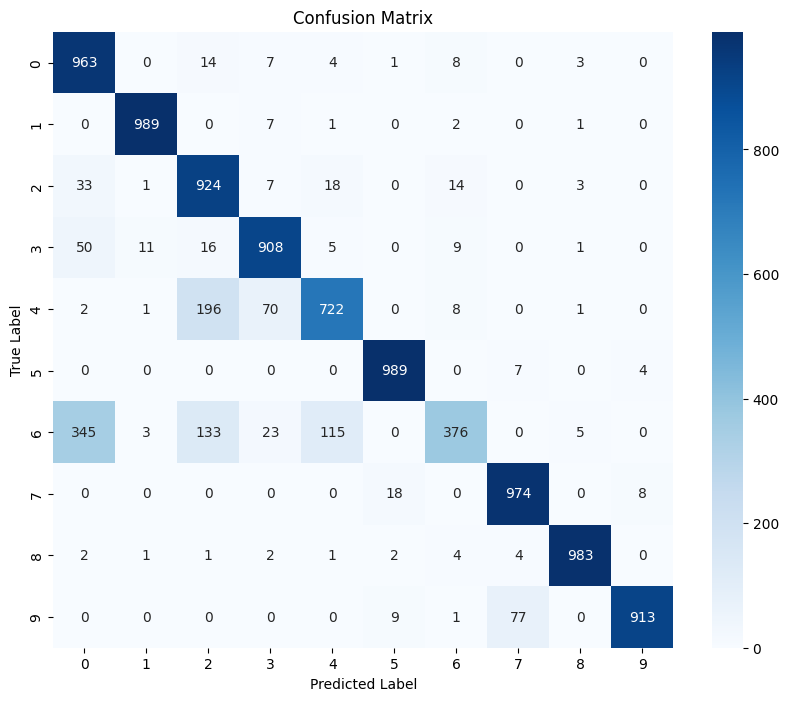

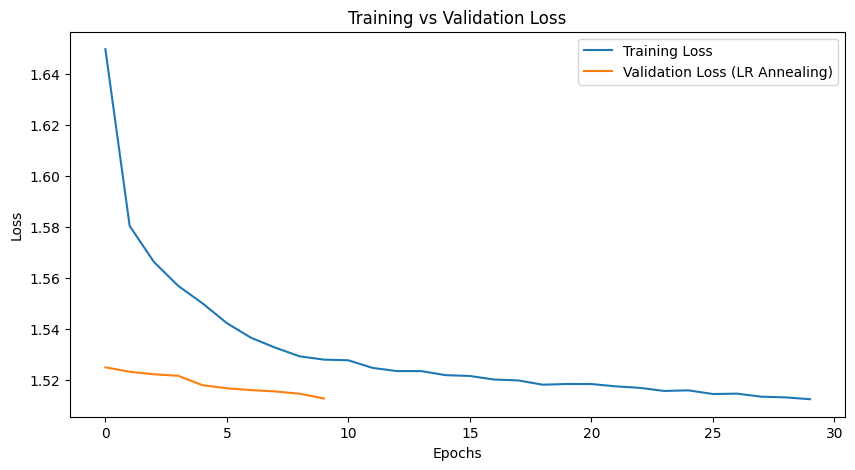

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import norse.torch as norse
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the dataset
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_data, val_data = train_test_split(dataset, test_size=0.1667, random_state=42)  # 50,000 train and 10,000 validation

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the SNN architecture with convolutional layers
class SNNModel(nn.Module):
    def __init__(self):
        super(SNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.lif1 = norse.LIFCell()
        self.fc2 = nn.Linear(512, 10)
        self.lif2 = norse.LIFCell()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(torch.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(torch.relu(self.batchnorm2(self.conv2(x))))
        x = self.dropout(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        z1 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z1 = self.lif1(x, z1)
        x = self.fc2(x)
        z2 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z2 = self.lif2(x, z2)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SNNModel().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)

# Training function
def train(net, trainloader, epochs=30):
    train_losses = []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_losses.append(running_loss / len(trainloader))
        print(f'Epoch [{epoch + 1}], Training Loss: {running_loss / len(trainloader):.3f}')

    return train_losses

# Fine-tuning function
def fine_tune(net, valloader, optimizer, criterion, scheduler, epochs=10):
    val_losses = []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(valloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        val_losses.append(running_loss / len(valloader))
        scheduler.step()
        print(f'Epoch [{epoch + 1}], Validation Loss: {running_loss / len(valloader):.3f}')

    return val_losses

# Detailed evaluation function
def detailed_evaluate(net, dataloader):
    net.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            c = (predicted == labels).squeeze()
            for i in range(labels.size(0)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    accuracy = 100 * correct / total
    print(f'Overall Accuracy: {accuracy:.2f}%')

    # Per-class accuracy
    classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
    for i in range(10):
        class_acc = 100 * class_correct[i] / class_total[i]
        print(f'Accuracy of {classes[i]}: {class_acc:.2f}%')

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return accuracy, class_correct, class_total

# Train the baseline model
train_losses = train(net, trainloader, epochs=30)

# Fine-tune using the validation dataset with learning rate annealing
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
val_losses_lr_annealing = fine_tune(net, valloader, optimizer, criterion, scheduler, epochs=10)

# Evaluate the LR Annealing model
accuracy_lr_annealing, class_correct, class_total = detailed_evaluate(net, testloader)

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses_lr_annealing, label='Validation Loss (LR Annealing)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

#Learning Rate Scheduler, Adam Optimiser, Gradient Descent Optimisation

Epoch [1], Training Loss: 1.646, Validation Loss: 1.585
Epoch [2], Training Loss: 1.577, Validation Loss: 1.566
Epoch [3], Training Loss: 1.563, Validation Loss: 1.558
Epoch [4], Training Loss: 1.554, Validation Loss: 1.549
Epoch [5], Training Loss: 1.545, Validation Loss: 1.544
Epoch [6], Training Loss: 1.539, Validation Loss: 1.536
Epoch [7], Training Loss: 1.535, Validation Loss: 1.534
Epoch [8], Training Loss: 1.531, Validation Loss: 1.528
Epoch [9], Training Loss: 1.528, Validation Loss: 1.530
Epoch [10], Training Loss: 1.527, Validation Loss: 1.527
Epoch [11], Training Loss: 1.522, Validation Loss: 1.524
Epoch [12], Training Loss: 1.521, Validation Loss: 1.524
Epoch [13], Training Loss: 1.520, Validation Loss: 1.523
Epoch [14], Training Loss: 1.521, Validation Loss: 1.523
Epoch [15], Training Loss: 1.520, Validation Loss: 1.523
Epoch [16], Training Loss: 1.519, Validation Loss: 1.522
Epoch [17], Training Loss: 1.519, Validation Loss: 1.522
Epoch [18], Training Loss: 1.519, Valida

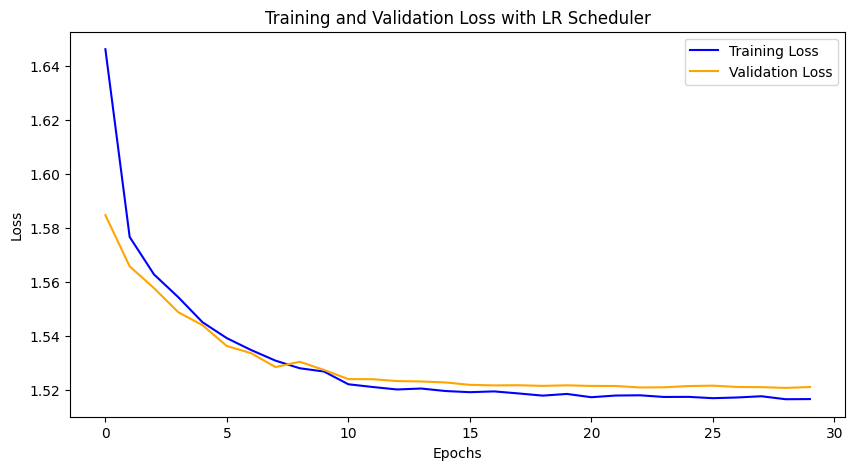

Epoch [1], Training Loss: 1.656, Validation Loss: 1.588
Epoch [2], Training Loss: 1.579, Validation Loss: 1.568
Epoch [3], Training Loss: 1.563, Validation Loss: 1.557
Epoch [4], Training Loss: 1.554, Validation Loss: 1.551
Epoch [5], Training Loss: 1.547, Validation Loss: 1.541
Epoch [6], Training Loss: 1.538, Validation Loss: 1.537
Epoch [7], Training Loss: 1.534, Validation Loss: 1.531
Epoch [8], Training Loss: 1.530, Validation Loss: 1.533
Epoch [9], Training Loss: 1.528, Validation Loss: 1.531
Epoch [10], Training Loss: 1.527, Validation Loss: 1.529
Epoch [11], Training Loss: 1.523, Validation Loss: 1.525
Epoch [12], Training Loss: 1.523, Validation Loss: 1.525
Epoch [13], Training Loss: 1.521, Validation Loss: 1.525
Epoch [14], Training Loss: 1.520, Validation Loss: 1.524
Epoch [15], Training Loss: 1.521, Validation Loss: 1.524
Epoch [16], Training Loss: 1.519, Validation Loss: 1.525
Epoch [17], Training Loss: 1.520, Validation Loss: 1.525
Epoch [18], Training Loss: 1.520, Valida

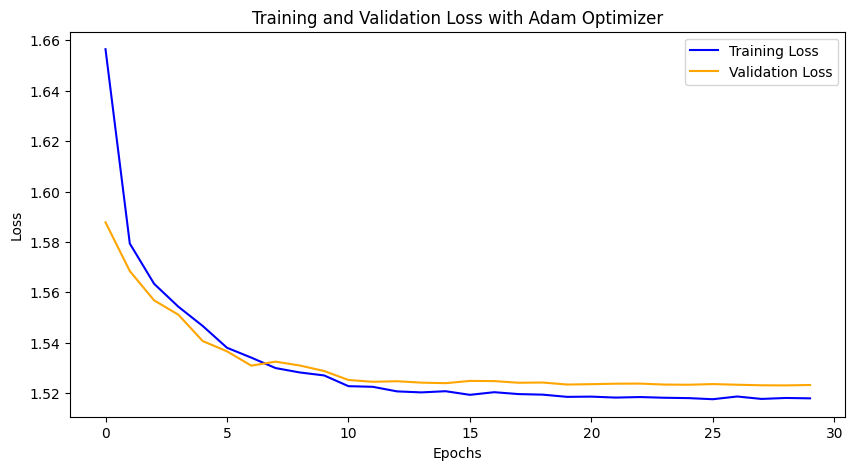

Epoch [1], Training Loss: 2.303, Validation Loss: 2.303
Epoch [2], Training Loss: 2.303, Validation Loss: 2.303
Epoch [3], Training Loss: 2.303, Validation Loss: 2.303
Epoch [4], Training Loss: 2.303, Validation Loss: 2.303
Epoch [5], Training Loss: 2.303, Validation Loss: 2.303
Epoch [6], Training Loss: 2.303, Validation Loss: 2.303
Epoch [7], Training Loss: 2.303, Validation Loss: 2.303
Epoch [8], Training Loss: 2.303, Validation Loss: 2.303
Epoch [9], Training Loss: 2.303, Validation Loss: 2.303
Epoch [10], Training Loss: 2.303, Validation Loss: 2.303
Epoch [11], Training Loss: 2.303, Validation Loss: 2.303
Epoch [12], Training Loss: 2.303, Validation Loss: 2.303
Epoch [13], Training Loss: 2.303, Validation Loss: 2.303
Epoch [14], Training Loss: 2.303, Validation Loss: 2.303
Epoch [15], Training Loss: 2.303, Validation Loss: 2.303
Epoch [16], Training Loss: 2.303, Validation Loss: 2.303
Epoch [17], Training Loss: 2.303, Validation Loss: 2.303
Epoch [18], Training Loss: 2.303, Valida

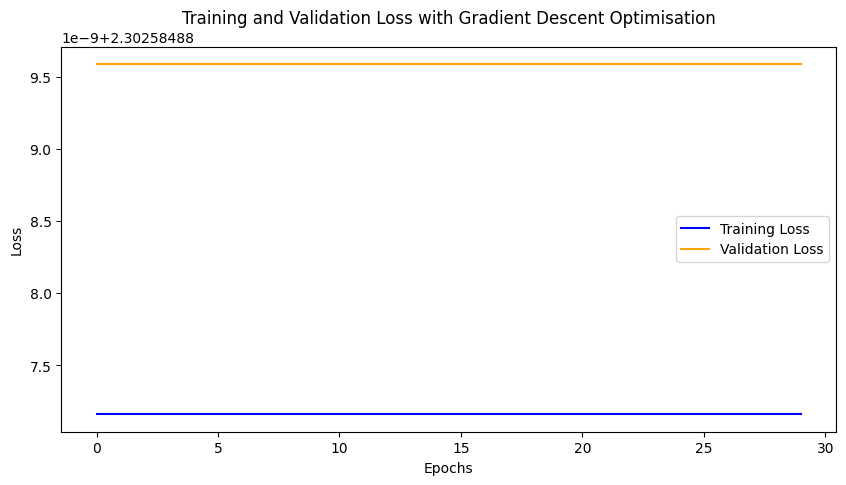

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import norse.torch as norse
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the dataset
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_data, val_data = train_test_split(dataset, test_size=0.1667, random_state=42)  # 50,000 train and 10,000 validation

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the SNN architecture with convolutional layers
class SNNModel(nn.Module):
    def __init__(self):
        super(SNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.lif1 = norse.LIFCell()
        self.fc2 = nn.Linear(512, 10)
        self.lif2 = norse.LIFCell()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(torch.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(torch.relu(self.batchnorm2(self.conv2(x))))
        x = self.dropout(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        z1 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z1 = self.lif1(x, z1)
        x = self.fc2(x)
        z2 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z2 = self.lif2(x, z2)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()

# Fine-tuning function with both training and validation loss tracking
def fine_tune(net, trainloader, valloader, optimizer, criterion, scheduler, epochs=10):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        avg_train_loss = running_loss / len(trainloader)
        train_losses.append(avg_train_loss)

        # Validation phase
        net.eval()
        val_loss = 0.0
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(valloader)
        val_losses.append(avg_val_loss)

        scheduler.step()

        print(f'Epoch [{epoch + 1}], Training Loss: {avg_train_loss:.3f}, Validation Loss: {avg_val_loss:.3f}')

    return train_losses, val_losses

# Evaluation function
def evaluate(net, dataloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network: {accuracy:.2f}%')
    return accuracy

# Fine-tune using LR Scheduler
net_lr_scheduler = SNNModel().to(device)
optimizer_lr_scheduler = optim.Adam(net_lr_scheduler.parameters(), lr=0.001)
scheduler_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_lr_scheduler, step_size=10, gamma=0.1)
train_losses_lr_scheduler, val_losses_lr_scheduler = fine_tune(net_lr_scheduler, trainloader, valloader, optimizer_lr_scheduler, criterion, scheduler_lr_scheduler, epochs=30)
accuracy_lr_scheduler = evaluate(net_lr_scheduler, testloader)

# Plot training and validation loss for LR Scheduler
plt.figure(figsize=(10, 5))
plt.plot(train_losses_lr_scheduler, label='Training Loss', color='blue')
plt.plot(val_losses_lr_scheduler, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with LR Scheduler')
plt.show()

# Fine-tune using Adam Optimizer
net_adam = SNNModel().to(device)
optimizer_adam = optim.Adam(net_adam.parameters(), lr=0.001)
scheduler_adam = optim.lr_scheduler.StepLR(optimizer_adam, step_size=10, gamma=0.1)
train_losses_adam, val_losses_adam = fine_tune(net_adam, trainloader, valloader, optimizer_adam, criterion, scheduler_adam, epochs=30)
accuracy_adam = evaluate(net_adam, testloader)

# Plot training and validation loss for Adam Optimizer
plt.figure(figsize=(10, 5))
plt.plot(train_losses_adam, label='Training Loss', color='blue')
plt.plot(val_losses_adam, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with Adam Optimizer')
plt.show()

# Fine-tune using Gradient Descent Optimization
net_sgd = SNNModel().to(device)
optimizer_sgd = optim.SGD(net_sgd.parameters(), lr=0.001, momentum=0.9)
scheduler_sgd = optim.lr_scheduler.StepLR(optimizer_sgd, step_size=10, gamma=0.1)
train_losses_sgd, val_losses_sgd = fine_tune(net_sgd, trainloader, valloader, optimizer_sgd, criterion, scheduler_sgd, epochs=30)
accuracy_sgd = evaluate(net_sgd, testloader)

# Plot training and validation loss for Gradient Descent Optimization
plt.figure(figsize=(10, 5))
plt.plot(train_losses_sgd, label='Training Loss', color='blue')
plt.plot(val_losses_sgd, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with Gradient Descent Optimisation')
plt.show()

#Gradient Desscent Optimisation (Seperate Run)

Epoch [1], Training Loss: 2.264, Validation Loss: 2.053
Epoch [2], Training Loss: 1.754, Validation Loss: 1.622
Epoch [3], Training Loss: 1.607, Validation Loss: 1.591
Epoch [4], Training Loss: 1.586, Validation Loss: 1.580
Epoch [5], Training Loss: 1.578, Validation Loss: 1.574
Epoch [6], Training Loss: 1.570, Validation Loss: 1.567
Epoch [7], Training Loss: 1.566, Validation Loss: 1.565
Epoch [8], Training Loss: 1.561, Validation Loss: 1.558
Epoch [9], Training Loss: 1.557, Validation Loss: 1.554
Epoch [10], Training Loss: 1.551, Validation Loss: 1.547
Epoch [11], Training Loss: 1.546, Validation Loss: 1.545
Epoch [12], Training Loss: 1.545, Validation Loss: 1.543
Epoch [13], Training Loss: 1.543, Validation Loss: 1.543
Epoch [14], Training Loss: 1.543, Validation Loss: 1.543
Epoch [15], Training Loss: 1.543, Validation Loss: 1.542
Epoch [16], Training Loss: 1.542, Validation Loss: 1.542
Epoch [17], Training Loss: 1.541, Validation Loss: 1.542
Epoch [18], Training Loss: 1.541, Valida

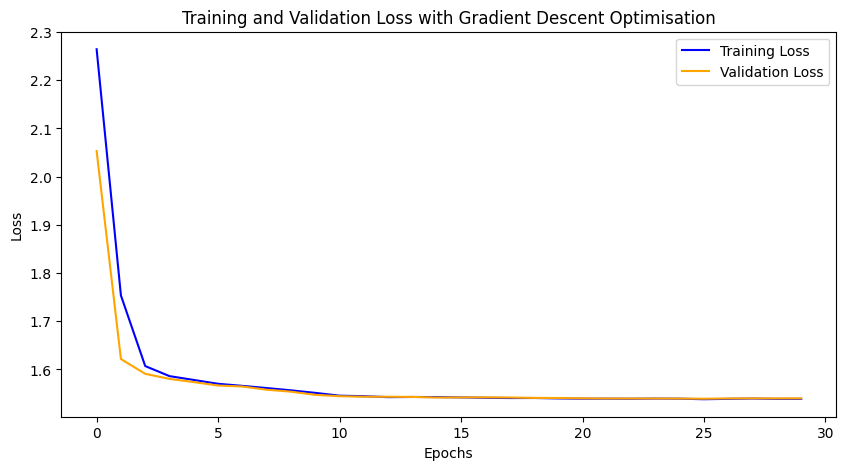

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import norse.torch as norse
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the dataset
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_data, val_data = train_test_split(dataset, test_size=0.1667, random_state=42)  # 50,000 train and 10,000 validation

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the SNN architecture with convolutional layers
class SNNModel(nn.Module):
    def __init__(self):
        super(SNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.lif1 = norse.LIFCell()
        self.fc2 = nn.Linear(512, 10)
        self.lif2 = norse.LIFCell()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(torch.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(torch.relu(self.batchnorm2(self.conv2(x))))
        x = self.dropout(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        z1 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z1 = self.lif1(x, z1)
        x = self.fc2(x)
        z2 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z2 = self.lif2(x, z2)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()

# Fine-tuning function with both training and validation loss tracking
def fine_tune(net, trainloader, valloader, optimizer, criterion, scheduler, epochs=10):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        avg_train_loss = running_loss / len(trainloader)
        train_losses.append(avg_train_loss)

        # Validation phase
        net.eval()
        val_loss = 0.0
        with torch.no_grad():
            for data in valloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        avg_val_loss = val_loss / len(valloader)
        val_losses.append(avg_val_loss)

        scheduler.step()

        print(f'Epoch [{epoch + 1}], Training Loss: {avg_train_loss:.3f}, Validation Loss: {avg_val_loss:.3f}')

    return train_losses, val_losses

# Evaluation function
def evaluate(net, dataloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network: {accuracy:.2f}%')
    return accuracy
# Fine-tune using Gradient Descent Optimization
net_sgd = SNNModel().to(device)
optimizer_sgd = optim.SGD(net_sgd.parameters(), lr=0.1, momentum=0.9)
scheduler_sgd = optim.lr_scheduler.StepLR(optimizer_sgd, step_size=10, gamma=0.1)
train_losses_sgd, val_losses_sgd = fine_tune(net_sgd, trainloader, valloader, optimizer_sgd, criterion, scheduler_sgd, epochs=30)
accuracy_sgd = evaluate(net_sgd, testloader)

# Plot training and validation loss for Gradient Descent Optimization
plt.figure(figsize=(10, 5))
plt.plot(train_losses_sgd, label='Training Loss', color='blue')
plt.plot(val_losses_sgd, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with Gradient Descent Optimisation')
plt.show()

#Predictions on LR Scheduler, Adam Optimiser, Gradient Descent Optimisation

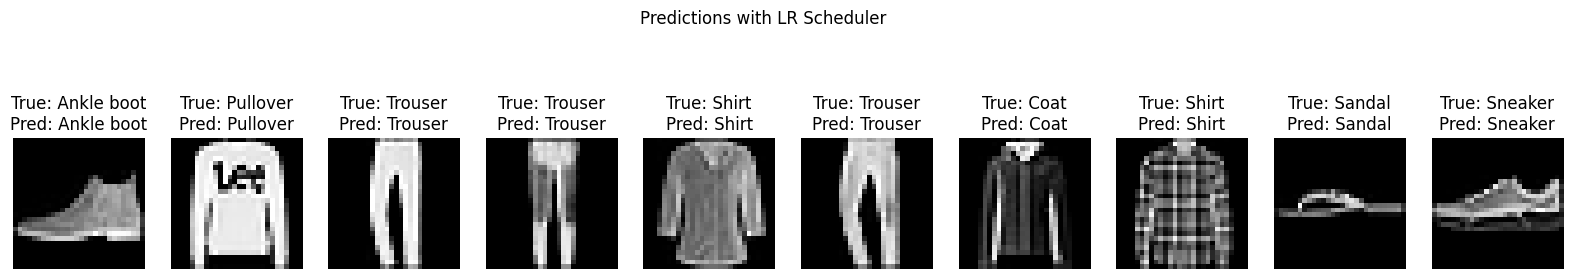

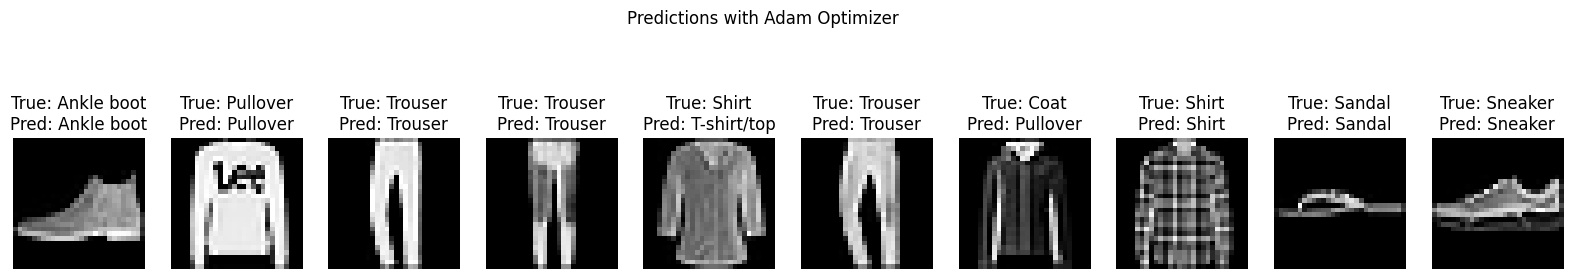

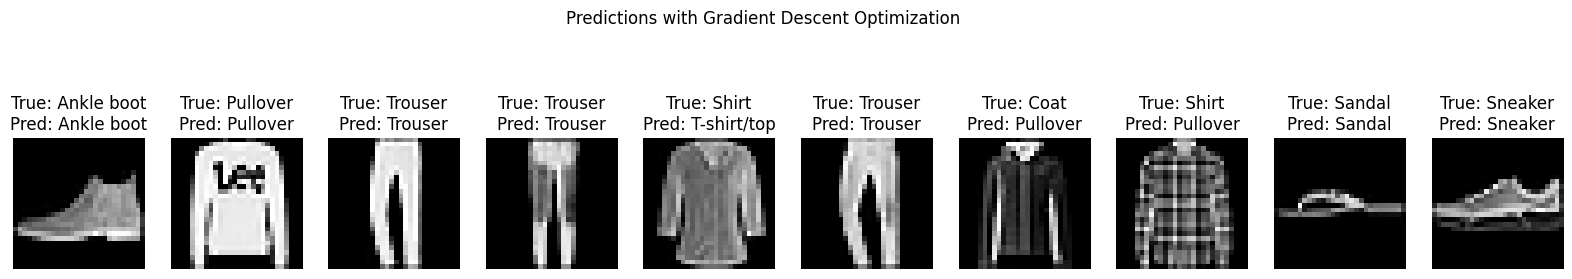

In [ ]:
#Predictions
# Function to visualize predictions for a given model
def visualize_predictions(net, dataloader, title, classes):
    net.eval()
    dataiter = iter(dataloader)
    images, labels = next(dataiter)  # Get a batch of test images
    images, labels = images.to(device), labels.to(device)

    # Get predictions
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    # Convert to CPU for visualization
    images = images.cpu().numpy()
    labels = labels.cpu().numpy()
    predicted = predicted.cpu().numpy()

    # Plot the images with their predictions
    fig, axes = plt.subplots(1, 10, figsize=(20, 4))
    fig.suptitle(title)
    for i in range(10):  # Display first 10 images
        ax = axes[i]
        img = images[i].squeeze()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {classes[labels[i]]}\nPred: {classes[predicted[i]]}")
        ax.axis('off')
    plt.show()

# Classes for FMNIST dataset
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Visualize predictions for the model trained with LR Scheduler
visualize_predictions(net_lr_scheduler, testloader, "Predictions with LR Scheduler", classes)

# Visualize predictions for the model trained with Adam Optimizer
visualize_predictions(net_adam, testloader, "Predictions with Adam Optimizer", classes)

# Visualize predictions for the model trained with Gradient Descent Optimization
visualize_predictions(net_sgd, testloader, "Predictions with Gradient Descent Optimization", classes)

#Generate graph of accuracies

#Test the best one--> LR annealing on testing data

Epoch [1], Validation Loss: 1.833
Epoch [2], Validation Loss: 1.613
Epoch [3], Validation Loss: 1.596
Epoch [4], Validation Loss: 1.588
Epoch [5], Validation Loss: 1.583
Epoch [6], Validation Loss: 1.578
Epoch [7], Validation Loss: 1.574
Epoch [8], Validation Loss: 1.568
Epoch [9], Validation Loss: 1.563
Epoch [10], Validation Loss: 1.558
Accuracy of the network: 76.67%


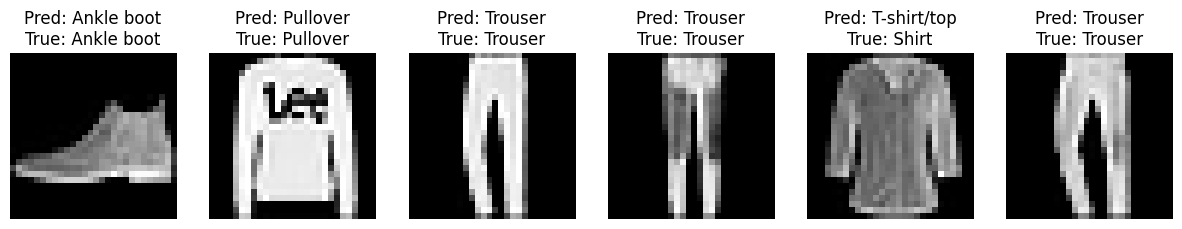

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import norse.torch as norse
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the dataset
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_data, val_data = train_test_split(dataset, test_size=0.1667, random_state=42)  # 50,000 train and 10,000 validation

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the SNN architecture with convolutional layers
class SNNModel(nn.Module):
    def __init__(self):
        super(SNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.lif1 = norse.LIFCell()
        self.fc2 = nn.Linear(512, 10)
        self.lif2 = norse.LIFCell()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(torch.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(torch.relu(self.batchnorm2(self.conv2(x))))
        x = self.dropout(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        z1 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z1 = self.lif1(x, z1)
        x = self.fc2(x)
        z2 = norse.LIFState(v=torch.zeros_like(x), i=torch.zeros_like(x), z=torch.zeros_like(x))
        x, z2 = self.lif2(x, z2)
        return x

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = SNNModel().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Fine-tuning function with learning rate annealing
def fine_tune(net, valloader, optimizer, criterion, scheduler, epochs=10):
    val_losses = []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, data in enumerate(valloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        val_losses.append(running_loss / len(valloader))
        scheduler.step()
        print(f'Epoch [{epoch + 1}], Validation Loss: {running_loss / len(valloader):.3f}')

    return val_losses

# Evaluation function to calculate accuracy
def evaluate(net, dataloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network: {accuracy:.2f}%')
    return accuracy

# Visualize predictions on the test dataset
def show_predictions(net, testloader, classes):
    net.eval()
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    # Display images and predictions
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))
    for i in range(6):
        ax = axes[i]
        img = images[i].cpu().numpy().squeeze()
        ax.imshow(img, cmap='gray')
        ax.set_title(f'Pred: {classes[predicted[i]]}\nTrue: {classes[labels[i]]}')
        ax.axis('off')
    plt.show()

# Classes for FMNIST dataset
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Fine-tune the model using LR Annealing on the validation dataset
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)
fine_tune(net, valloader, optimizer, criterion, scheduler, epochs=10)

# Evaluate the fine-tuned model on the test dataset
test_accuracy = evaluate(net, testloader)

# Visualize predictions on the test dataset
show_predictions(net, testloader, classes)

#Confusion Matrix for LR Annealing

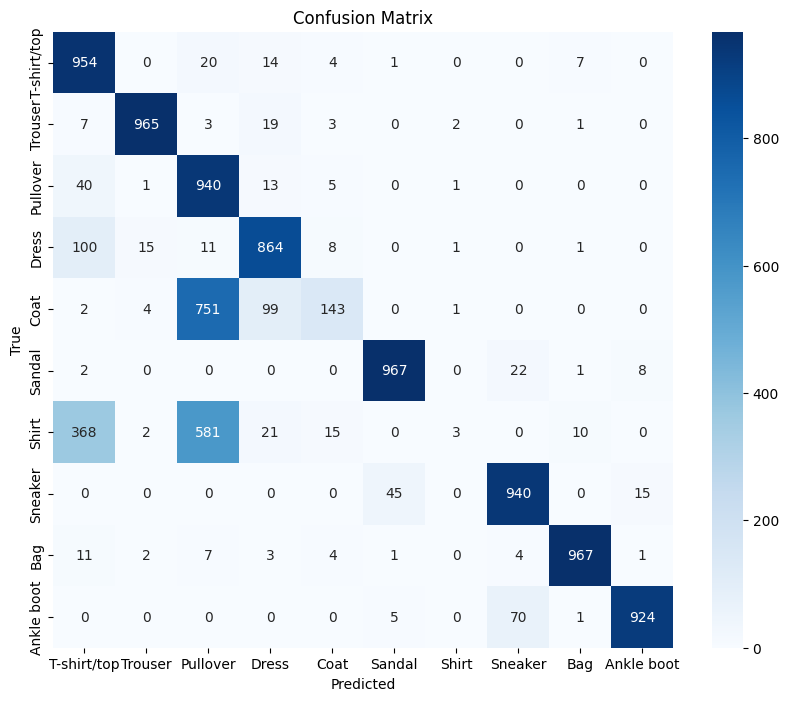

In [ ]:
#confusion matrix
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import norse.torch as norse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# (Omitted code for model, data loading, training, etc.)

# Function to compute confusion matrix
def plot_confusion_matrix(net, testloader, classes):
    net.eval()
    all_preds = torch.tensor([])
    all_labels = torch.tensor([])

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, preds = torch.max(outputs, 1)

            all_preds = torch.cat((all_preds.cpu(), preds.cpu()), dim=0)
            all_labels = torch.cat((all_labels.cpu(), labels.cpu()), dim=0)

    # Compute confusion matrix
    cm = confusion_matrix(all_labels.numpy(), all_preds.numpy())
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Classes for FMNIST dataset
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Train and evaluate the model as before (omitted for brevity)
# After training with LR Annealing:

# Plot the confusion matrix
plot_confusion_matrix(net, testloader, classes)

#Comparision of Accuracies of Different SNN Strategies

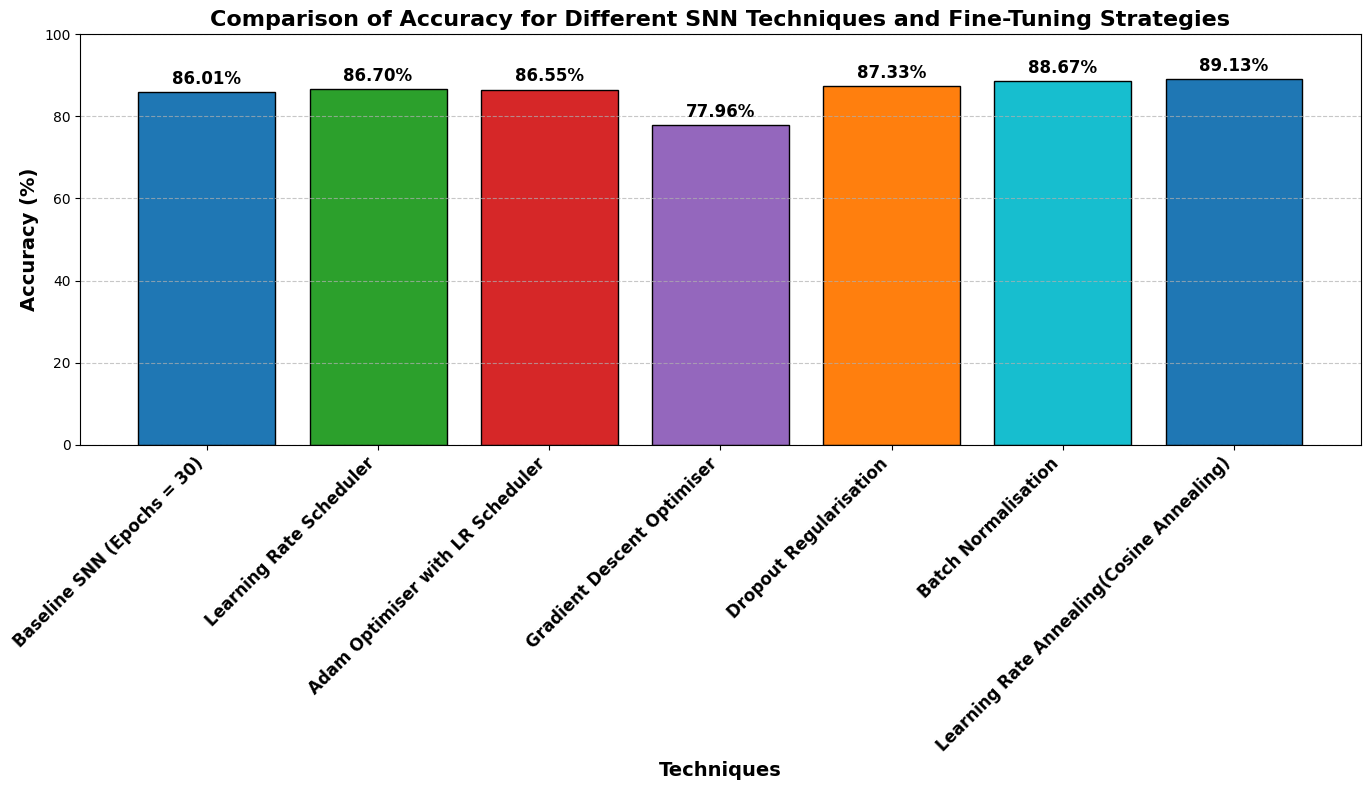

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values from the document
accuracies = {
    "Baseline SNN (Epochs = 30)": 86.01,
    "Learning Rate Scheduler": 86.70,
    "Adam Optimiser with LR Scheduler": 86.55,
    "Gradient Descent Optimiser": 77.96,
    "Dropout Regularisation":87.33,
    "Batch Normalisation": 88.67,
    "Learning Rate Annealing(Cosine Annealing)": 89.13
}

# Names and values for the plot
names = list(accuracies.keys())
values = list(accuracies.values())

# Plotting the bar graph
plt.figure(figsize=(14, 8))
bars = plt.bar(names, values, color=['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#17becf'], edgecolor='black')

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customizing x and y axis labels and title
plt.xlabel('Techniques', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.title('Comparison of Accuracy for Different SNN Techniques and Fine-Tuning Strategies', fontsize=16, fontweight='bold')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=12, fontweight='bold')

# Setting y-axis limit
plt.ylim(0, 100)

# Adding a tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()